In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
moviesDF = pd.read_csv("movies.csv")
ratingsDF = pd.read_csv("ml-32m/ratings.csv")

In [6]:
moviesDF

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [7]:
ratingsDF

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [8]:
movieRatingsDF = ratingsDF.merge(moviesDF, on="movieId", how="inner")

In [9]:
movieRatingsDF = movieRatingsDF[["title", "genres", "rating"]]
movieRatingsDF

,title,genres,rating
0,Sense and Sensibility (1995),Drama|Romance,4.0
1,Leaving Las Vegas (1995),Drama|Romance,1.0
2,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,2.0
3,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,5.0
4,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,5.0
...,...,...,...
32000199,Scott Pilgrim vs. the World (2010),Action|Comedy|Fantasy|Musical|Romance,4.5
32000200,Centurion (2010),Action|Adventure|Drama|Thriller|War,1.0
32000201,Vampires Suck (2010),Comedy,0.5
32000202,"Social Network, The (2010)",Drama,3.5


In [10]:
titleHightoLow = movieRatingsDF.sort_values(by=["title", "rating"], ascending=[True, False])

In [11]:
titleHightoLow

,title,genres,rating
1433630,(2019),Drama|Thriller,4.0
13110809,(2019),Drama|Thriller,4.0
16934644,(2019),Drama|Thriller,4.0
27820392,(2019),Drama|Thriller,4.0
13162479,(2019),Drama|Thriller,3.5
...,...,...,...
17054426,貞子3D (2012),Horror,0.5
22747100,貞子3D (2012),Horror,0.5
29793804,过昭关,(no genres listed),3.5
23888852,줄탁동시 (2012),(no genres listed),5.0


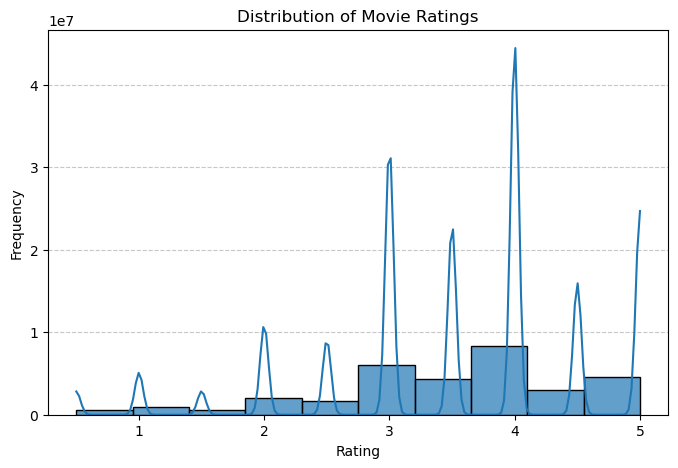

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(movieRatingsDF["rating"], bins=10, kde=True, edgecolor="black", alpha=0.7)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


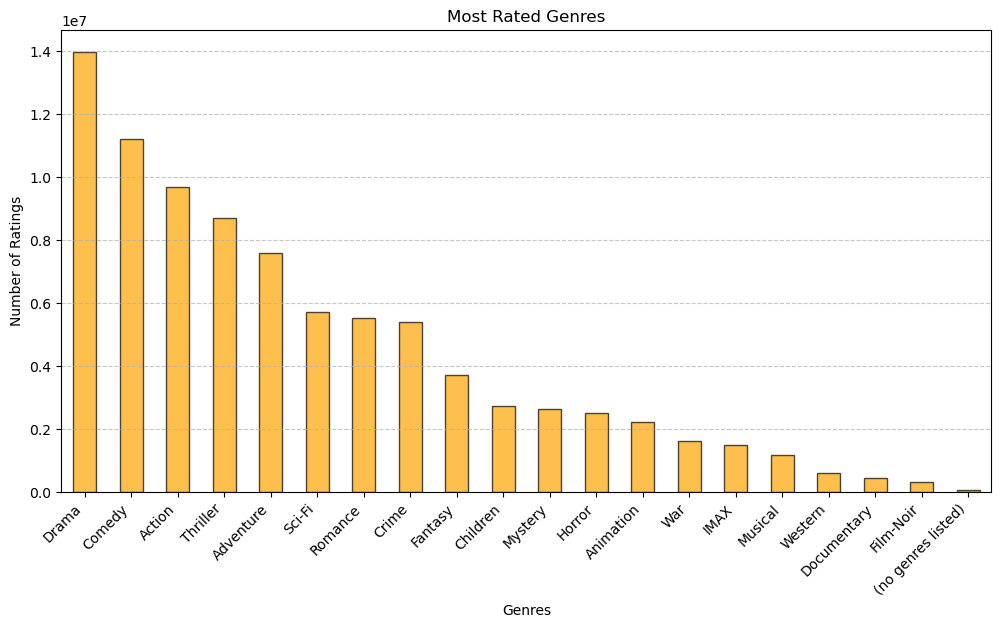

In [18]:
genre_counts = (
    movieRatingsDF.assign(genres=movieRatingsDF["genres"].str.split('|'))
    .explode("genres")["genres"]
    .value_counts()
)

plt.figure(figsize=(12,6))
genre_counts.plot(kind="bar", color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Genres")
plt.ylabel("Number of Ratings")
plt.title("Most Rated Genres")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


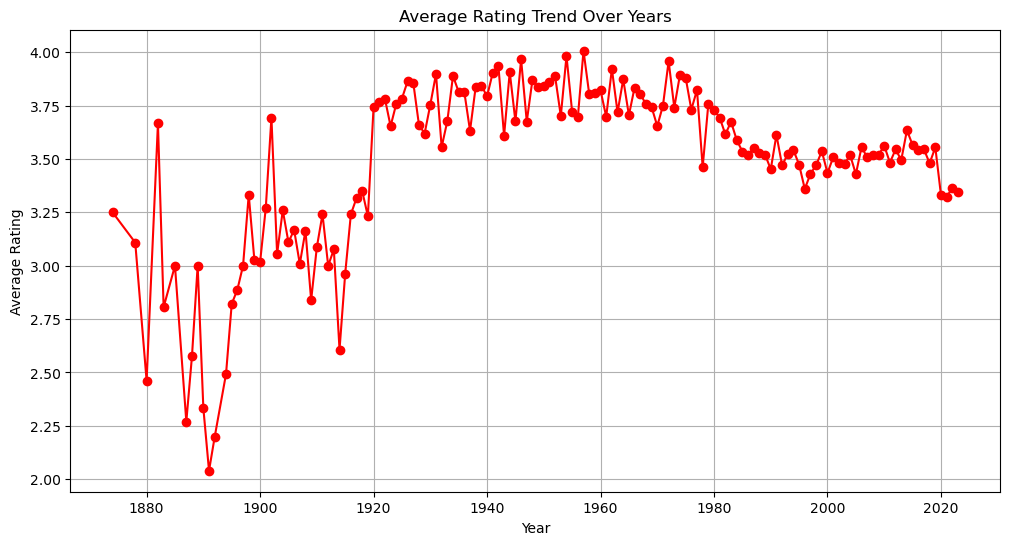

In [22]:
movieRatingsDF["year"] = movieRatingsDF["title"].str.extract(r"\((\d{4})\)").astype(float)

avg_rating_by_year = movieRatingsDF.groupby("year")["rating"].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_rating_by_year, marker="o", linestyle="-", color="red")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Trend Over Years")
plt.grid(True)
plt.show()
